In [11]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "/Users/dariareichkina/Projects/Bootcamp/CryptoClustering/Resources/crypto_market_data.csv")

# Display sample data
df_market_data.head(10)

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
5,binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
6,chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
7,cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
8,litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408
9,bitcoin-cash-sv,0.92530,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082


In [7]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [8]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

---

### Prepare the Data

In [9]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data.drop(columns=['coin_id']))


In [10]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df_market_data.columns[1:])
# Copy the crypto names from the original data
scaled_df.set_index(df_market_data['coin_id'], inplace=True)
# Set the coinid column as index
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [12]:
# Create a list with the number of k-values from 1 to 11
k_values = range(1, 12)


In [14]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia_values.append(kmeans.inertia_)

/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

In [15]:
# Create a dictionary with the data to plot the Elbow curve
data_e = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
e_df = pd.DataFrame(data_e)

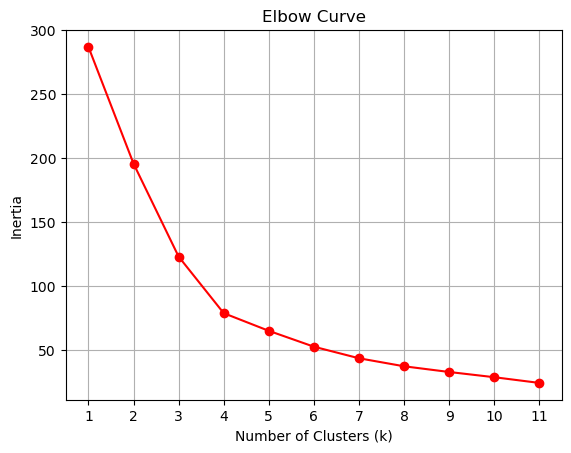

In [16]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(e_df['k_values'], e_df['inertia_values'], marker='o', color='red')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [17]:
# Initialize the K-Means model using the best value for k
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42)

In [18]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [23]:
# Predict the clusters to group the cryptocurrencies using the scaled data
scaled_df['cluster'] = kmeans.labels_

# Print the resulting array of cluster values.
scaled_df['cluster'].head()

coin_id
bitcoin         2
ethereum        2
tether          0
ripple          0
bitcoin-cash    2
Name: cluster, dtype: int32

In [24]:
# Create a copy of the DataFrame
scaled_df_c = scaled_df.copy()

In [25]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df_c['predicted_cluster'] = kmeans.labels_

# Display sample data
scaled_df_c.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster,predicted_cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


In [26]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = scaled_df_c.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='predicted_cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters (K-Means)',
    xlabel='24h Price Change Percentage',
    ylabel='7d Price Change Percentage'
)

scatter_plot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [27]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [28]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(scaled_df_c)
# View the first five rows of the DataFrame. 
scaled_df_c.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster,predicted_cluster
coin_id,,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,2


In [29]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_.sum()
print(explained_variance)

0.8938324738956318


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89

In [30]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data

# Set the coinid column as index

# Display sample data
pca_columns = ['PCA1', 'PCA2', 'PCA3']
pca_df = pd.DataFrame(data=pca_data, columns=pca_columns, index=scaled_df_c.index)
crypto_names = df_market_data['coin_id']
pca_df.index.name = 'coin_id'
pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,1.458128,-1.218093,-0.608715
ethereum,1.552537,-0.919870,-1.063039
tether,-1.221287,-0.059882,0.450926
ripple,-1.200417,-0.072402,0.313921
bitcoin-cash,2.232568,-2.525260,-0.798863


---

### Find the Best Value for k Using the PCA Data

In [31]:
# Create a list with the number of k-values from 1 to 11
k_values1 = range(1, 12)

In [32]:
# Create an empty list to store the inertia values
inertia_values1 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca` (pca_df)
# 3. Append the model.inertia_ to the inertia list
for k in k_values1:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia_values1.append(kmeans.inertia_)

/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

In [33]:
# Create a dictionary with the data to plot the Elbow curve
data_e1 = {
    'k_values': k_values1,
    'inertia_values': inertia_values1
}
# Create a DataFrame with the data to plot the Elbow curve
e_df1 = pd.DataFrame(data_e1)



In [38]:
e_df1.head()

,k_values,inertia_values
0,1,328.123721
1,2,202.843738
2,3,111.111738
3,4,41.444094
4,5,30.634971


In [39]:
e_df.head()

,k_values,inertia_values
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364


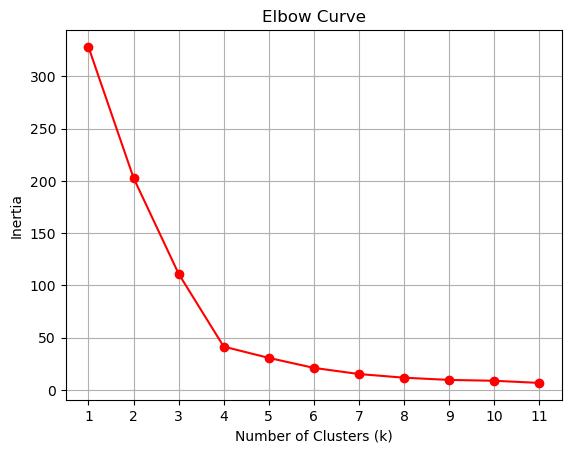

In [37]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(e_df1['k_values'], e_df1['inertia_values'], marker='o', color='red')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values1)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** the elbow method


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  In general depends on dataset, in this case - no

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [40]:
# Initialize the K-Means model using the best value for k
k_pca = 4  
kmeans_pca = KMeans(n_clusters=k_pca, random_state=42)

In [41]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_data)

/Users/dariareichkina/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [42]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_df['cluster'] = kmeans_pca.labels_
# Print the resulting array of cluster values.
print(pca_df['cluster'].values)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [43]:
# Create a copy of the DataFrame with the PCA data
pca_df_c = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_c['predicted_cluster'] = kmeans_pca.labels_

# Display sample data
pca_df_c.head()

,PCA1,PCA2,PCA3,cluster,predicted_cluster
coin_id,,,,,
bitcoin,1.458128,-1.218093,-0.608715,1,1
ethereum,1.552537,-0.919870,-1.063039,1,1
tether,-1.221287,-0.059882,0.450926,0,0
ripple,-1.200417,-0.072402,0.313921,0,0
bitcoin-cash,2.232568,-2.525260,-0.798863,1,1


In [45]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = pca_df_c.hvplot.scatter(
    x='PCA1', 
    y='PCA2', 
    by='cluster',  
    hover_cols=['coin_id'],
    title='PCA Scatter Plot with K-Means Clustering'
)
scatter_plot

:NdOverlay   [cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [51]:
# Composite plot to contrast the Elbow curves

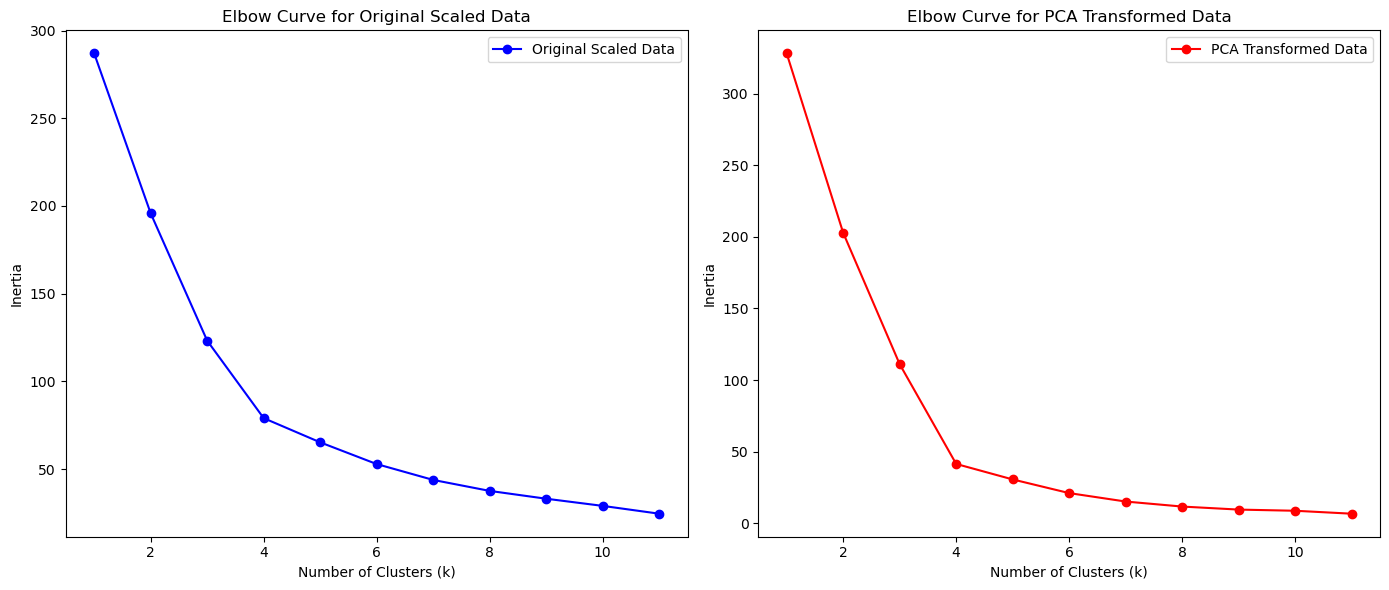

In [50]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(k_values, inertia_values, marker='o', color='blue', label='Original Scaled Data')
axes[0].set_title('Elbow Curve for Original Scaled Data')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].legend()

axes[1].plot(k_values1, inertia_values1, marker='o', color='red', label='PCA Transformed Data')
axes[1].set_title('Elbow Curve for PCA Transformed Data')
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Inertia')
axes[1].legend()

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** reduce ambiduity, better interpetation of results